In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [2]:
def missing_values_barplot(df, missing=True, return_vals=False):
    """ Takes a dataframe and plots the percentage of missing values (or not missing if set False) """
    # Sorted percentage of missing (or contained) values
    s_amount = 100 * df.isna().sum() / df.shape[0]
    if missing == False:
        s_amount = 100 - s_amount
    s_amount.sort_values(ascending=False, inplace=True)

    # Barplot it
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(s_amount.index, s_amount.values, ax=ax, palette="Blues_d")

    # Some niceties
    ax.set_title('% {} values'.format('Missing' if missing else 'Contained'), weight='bold', fontsize=16)
    plt.xticks(rotation=45)

    if return_vals:
        return s_amount


In [3]:
def to_str(i):
    st = str(i)
    return (5-len(st))*'0' + st

with_sepsis = list()

for i in range(100,201):
    filename = "training_B\p1"+to_str(i)+".csv"
    d1 = pd.read_csv(filename)
    if d1['SepsisLabel'].mean()>0.01:
        with_sepsis.append(filename)
        
with_sepsis

['training_B\\p100100.csv',
 'training_B\\p100104.csv',
 'training_B\\p100111.csv',
 'training_B\\p100125.csv',
 'training_B\\p100162.csv']

In [4]:
d1 = pd.read_csv("training_A\p000054.csv")
print(d1.columns)
d1[['Lactate','SBP','MAP','Resp','Bilirubin_direct','Bilirubin_total','FiO2','PaCO2','WBC']]


Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


,Lactate,SBP,MAP,Resp,Bilirubin_direct,Bilirubin_total,FiO2,PaCO2,WBC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,108.0,63.0,13.0,NaN,NaN,NaN,NaN,NaN
2,NaN,123.0,75.0,19.0,NaN,NaN,NaN,NaN,NaN
3,NaN,103.0,58.0,22.0,NaN,NaN,NaN,NaN,NaN
4,NaN,126.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN
5,NaN,98.0,62.0,23.0,NaN,NaN,NaN,NaN,NaN
6,NaN,108.0,67.0,17.0,NaN,NaN,NaN,NaN,19.7
7,NaN,103.0,65.0,16.0,NaN,NaN,NaN,NaN,NaN
8,NaN,99.0,66.0,16.0,NaN,NaN,NaN,NaN,NaN
9,NaN,100.0,65.0,23.0,NaN,NaN,NaN,NaN,NaN


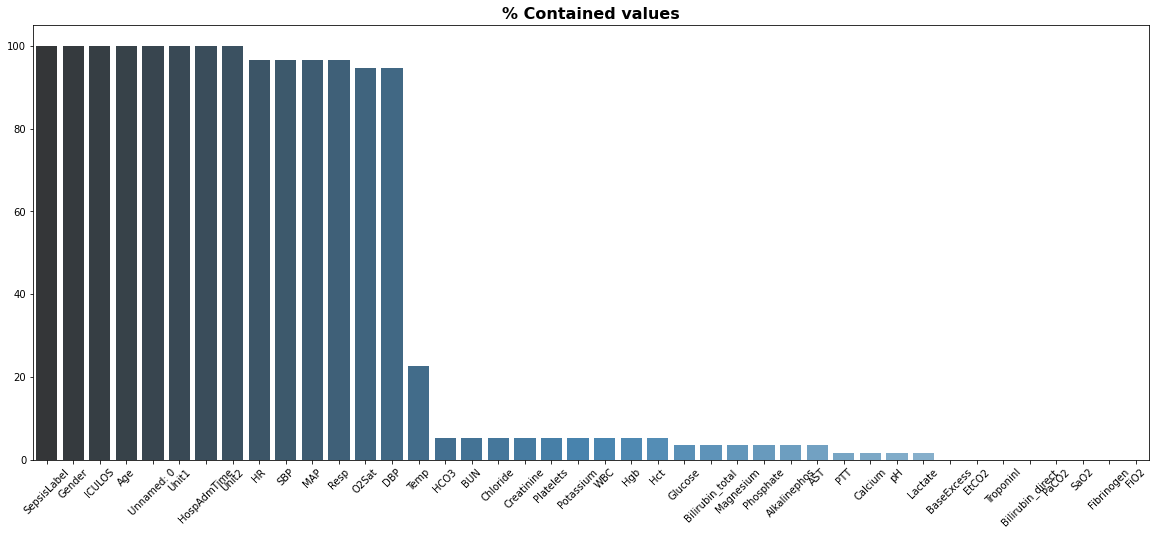

In [6]:
missing_values_barplot(d1, missing=False)

## filling missing values

,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,1,0
1,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,2,0
2,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,3,0
3,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,4,0
4,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,5,0
5,103.921569,1.621569,NaN,93.823529,1.3,2.555556,2.985185,4.256863,0.725,NaN,...,19.04902,NaN,566.333333,70.51,1,0,1,-323.82,6,0
6,104.000000,2.000000,NaN,88.000000,1.3,2.555556,2.985185,4.400000,0.725,NaN,...,19.70000,NaN,592.000000,70.51,1,0,1,-323.82,7,0
7,104.000000,2.000000,NaN,88.000000,1.3,2.555556,2.985185,4.400000,0.725,NaN,...,19.70000,NaN,592.000000,70.51,1,0,1,-323.82,8,0
8,104.000000,2.000000,NaN,88.000000,1.3,2.555556,2.985185,4.400000,0.725,NaN,...,19.70000,NaN,592.000000,70.51,1,0,1,-323.82,9,0
9,104.000000,2.000000,NaN,88.000000,1.3,2.555556,2.985185,4.400000,0.725,NaN,...,19.70000,NaN,592.000000,70.51,1,0,1,-323.82,10,0


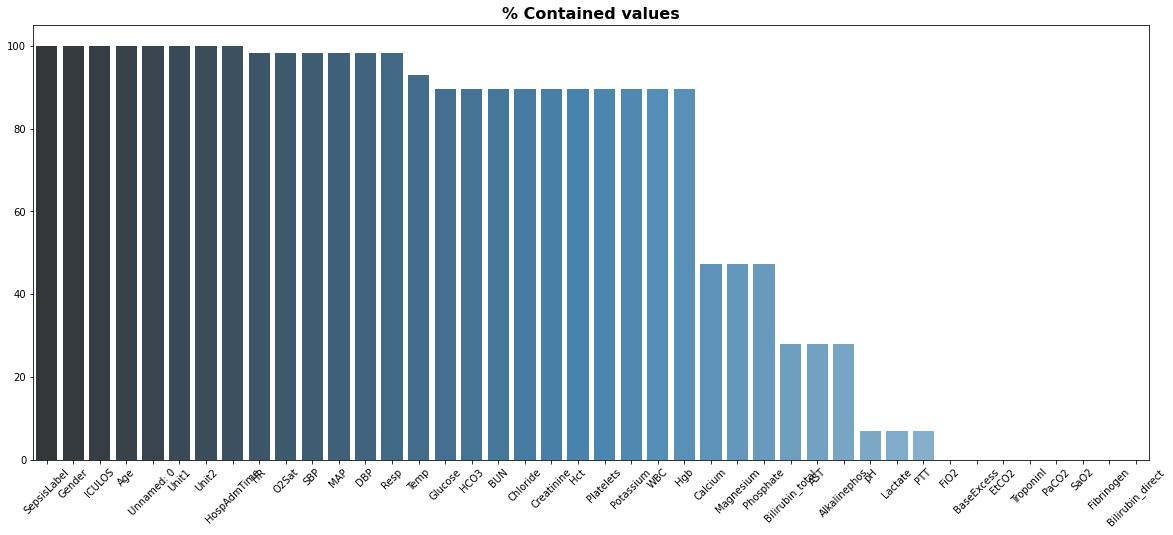

In [7]:

for col in d1.columns:
    d1[col].fillna( method ='ffill', inplace = True)
    
missing_values_barplot(d1, missing=False)

for col in d1.columns:
    d1[col].fillna(d1[col].mean(), inplace = True)

# imputer = KNNImputer(n_neighbors=3)
# d1 = pd.DataFrame(imputer.fit_transform(d1))
d1[d1.columns[19:]]

,Lactate,SBP,MAP,Resp,Bilirubin_direct,Bilirubin_total,FiO2,PaCO2
0,1.3,103.982143,65.821429,20.053571,NaN,0.725,NaN,NaN
1,1.3,108.000000,63.000000,13.000000,NaN,0.725,NaN,NaN
2,1.3,123.000000,75.000000,19.000000,NaN,0.725,NaN,NaN
3,1.3,103.000000,58.000000,22.000000,NaN,0.725,NaN,NaN
4,1.3,126.000000,76.000000,24.000000,NaN,0.725,NaN,NaN
5,1.3,98.000000,62.000000,23.000000,NaN,0.725,NaN,NaN
6,1.3,108.000000,67.000000,17.000000,NaN,0.725,NaN,NaN
7,1.3,103.000000,65.000000,16.000000,NaN,0.725,NaN,NaN
8,1.3,99.000000,66.000000,16.000000,NaN,0.725,NaN,NaN
9,1.3,100.000000,65.000000,23.000000,NaN,0.725,NaN,NaN


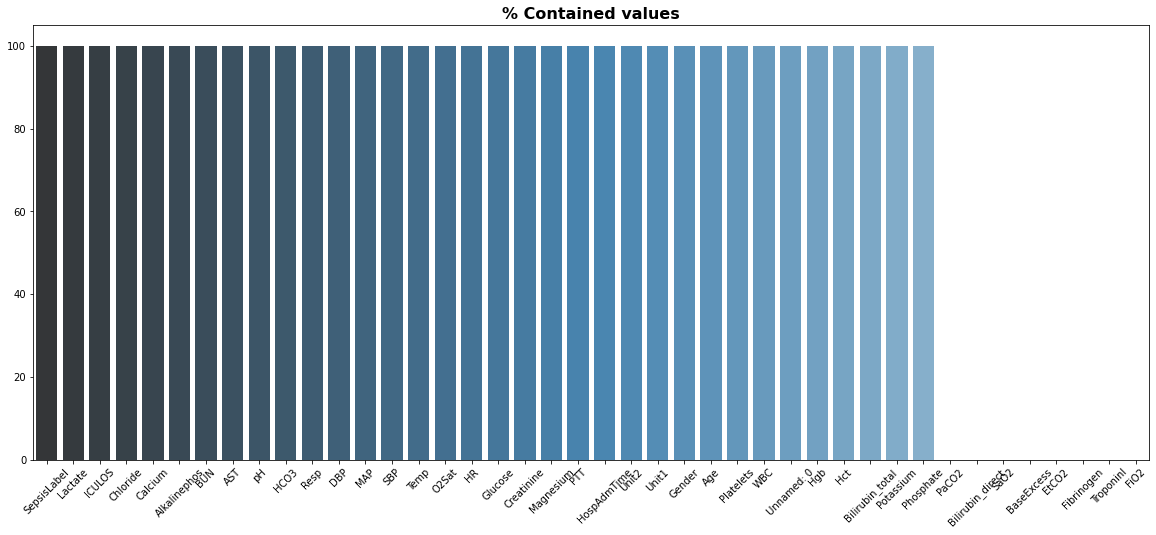

In [8]:
missing_values_barplot(d1, missing=False)
d1[['Lactate','SBP','MAP','Resp','Bilirubin_direct','Bilirubin_total','FiO2','PaCO2']]

In [9]:
print(d1.columns)

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


# creating signature object

In [10]:
# d1[['Lactate','SBP','MAP','Resp','Bilirubin_direct','Bilirubin_total','FiO2','PaCO2']]

d2 = pd.DataFrame()
SF = list()
qSF = list()
Sirs = list()
for row in d1['Unnamed: 0']:
    SOFA_score = 0

    count = 0
    #calculate sofa
    if d1['PaCO2'][row-1]!=np.NaN and d1['FiO2'][row-1]!=np.NaN :
        ratio = 713-((5/4)*(d1['PaCO2'][row-1]/d1['FiO2'][row-1]))
    else:
        ratio = np.NaN
    Platelets = d1['Platelets'][row-1]
    Bilirubin = d1['Bilirubin_total'][row-1]
    Creatinine = d1['Creatinine'][row-1]

    MAP = d1['MAP'][row-1]

    if MAP<70:
        SOFA_score+=1

    if ratio<100:
        SOFA_score += 1
    if ratio<200:
        SOFA_score += 1
    if ratio<300:
        SOFA_score += 1
    if ratio<400:
        SOFA_score += 1

    if Bilirubin>1.2:
        SOFA_score+=1
    if Bilirubin>2:
        SOFA_score+=1
    if Bilirubin>6:
        SOFA_score+=1
    if Bilirubin>12:
        SOFA_score+=1


    if Platelets<20:
        SOFA_score+=1
    if Platelets<50:
        SOFA_score+=1
    if Platelets<100:
        SOFA_score+=1
    if Platelets<150:
        SOFA_score+=1

    if Creatinine>1.2:
        SOFA_score+=1
    if Creatinine>2:
        SOFA_score+=1
    if Creatinine>3.5:
        SOFA_score+=1
    if Creatinine>5:
        SOFA_score+=1

    if d1['Resp'][row-1]>22 or d1['SBP'][row-1]<100:
        qSOFA = 1
    else:  qSOFA = 0

    if d1['Temp'][row-1]>38 or d1['Temp'][row-1] <36:
        count+=1
    if d1['Resp'][row-1]>20:
        count+=1
    if d1['HR'][row-1]>90:
        count+=1
    if d1['WBC'][row-1]>12 or d1['WBC'][row-1] <4:
        count+=1

    if count>1:
        sirs = 1
    else: sirs = 0

    SF.append(SOFA_score)
    qSF.append(qSOFA)
    Sirs.append(sirs)

    
d2['SOFA_score'] = SF
d2['qSOFA'] = qSF
d2['SIRS'] = Sirs
d2['sepsis_label'] = d1['SepsisLabel']
d2.shape

(57, 46)

In [11]:
np.array(d1)

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,SOFA_score,qSOFA,SIRS,sepsis_label
0,1,90.803571,95.178571,36.339811,103.982143,65.821429,54.357143,20.053571,NaN,NaN,...,1,0,1,-323.82,1,0,2,0,1,0
1,2,75.000000,97.000000,36.339811,108.000000,63.000000,46.000000,13.000000,NaN,NaN,...,1,0,1,-323.82,2,0,2,0,0,0
2,3,80.000000,93.000000,36.339811,123.000000,75.000000,55.000000,19.000000,NaN,NaN,...,1,0,1,-323.82,3,0,1,0,0,0
3,4,78.000000,95.000000,36.339811,103.000000,58.000000,44.000000,22.000000,NaN,NaN,...,1,0,1,-323.82,4,0,2,0,1,0
4,5,82.000000,95.000000,35.720000,126.000000,76.000000,54.000000,24.000000,NaN,NaN,...,1,0,1,-323.82,5,0,1,1,1,0
5,6,79.000000,96.000000,35.720000,98.000000,62.000000,48.000000,23.000000,NaN,NaN,...,1,0,1,-323.82,6,0,2,1,1,0
6,7,81.000000,96.000000,35.720000,108.000000,67.000000,49.000000,17.000000,NaN,NaN,...,1,0,1,-323.82,7,0,2,0,1,0
7,8,82.000000,95.000000,35.720000,103.000000,65.000000,48.000000,16.000000,NaN,NaN,...,1,0,1,-323.82,8,0,2,0,1,0
8,9,83.000000,96.000000,35.720000,99.000000,66.000000,51.000000,16.000000,NaN,NaN,...,1,0,1,-323.82,9,0,2,1,1,0
9,10,85.000000,96.000000,35.720000,100.000000,65.000000,54.000000,23.000000,NaN,NaN,...,1,0,1,-323.82,10,0,2,1,1,0


In [19]:
d2.corr(method ='kendall') # 'pearson', 'kendall', 'spearman'

""
